<a href="https://colab.research.google.com/github/trinay-A/Temp/blob/main/BTC2021_LSTM%2BGRU%2BBiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional
from sklearn.metrics import mean_squared_error

In [52]:
df = pd.read_csv('/content/DataBTC2021.csv')
df = df[['Time', 'Price']]
df['Time'] = pd.to_datetime(df['Price'])
df = df.set_index('Time')

In [53]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size, :], data[train_size:len(data), :]

In [54]:
def create_dataset(dataset, window_size=60):
    X, y = [], []
    for i in range(len(dataset)-window_size-1):
        X.append(dataset[i:(i+window_size), 0])
        y.append(dataset[(i+window_size), 0])
    return np.array(X), np.array(y)

window_size = 60
train_X, train_y = create_dataset(train_data, window_size)
test_X, test_y = create_dataset(test_data, window_size)

train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [76]:

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(window_size, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(train_X, train_y, epochs=300, batch_size=32, verbose=1)

#200 16
# GRU model
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(window_size, 1)))
gru_model.add(Dense(1))
gru_model.compile(loss='mean_squared_error', optimizer='adam')
gru_model.fit(train_X, train_y, epochs=100, batch_size=16, verbose=1)

# Bidirectional LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(50, input_shape=(window_size, 1))))
bilstm_model.add(Dense(1))
bilstm_model.compile(loss='mean_squared_error', optimizer='adam')
bilstm_model.fit(train_X, train_y, epochs=300, batch_size=16, verbose=1)


Epoch 1/300
17/17 [==============================] - 2s 29ms/step - loss: 0.0687
Epoch 2/300
17/17 [==============================] - 1s 34ms/step - loss: 0.0076
Epoch 3/300
17/17 [==============================] - 1s 34ms/step - loss: 0.0051
Epoch 4/300
17/17 [==============================] - 1s 35ms/step - loss: 0.0042
Epoch 5/300
17/17 [==============================] - 1s 35ms/step - loss: 0.0037
Epoch 6/300
17/17 [==============================] - 1s 30ms/step - loss: 0.0033
Epoch 7/300
17/17 [==============================] - 0s 29ms/step - loss: 0.0032
Epoch 8/300
17/17 [==============================] - 1s 30ms/step - loss: 0.0031
Epoch 9/300
17/17 [==============================] - 0s 28ms/step - loss: 0.0031
Epoch 10/300
17/17 [==============================] - 1s 31ms/step - loss: 0.0030
Epoch 11/300
17/17 [==============================] - 0s 28ms/step - loss: 0.0029
Epoch 12/300
17/17 [==============================] - 1s 30ms/step - loss: 0.0028
Epoch 13/300
17/17 [=====

In [75]:
# LSTM model predictions
train_predict_lstm = lstm_model.predict(train_X)
test_predict_lstm = lstm_model.predict(test_X)

# GRU model predictions
train_predict_gru = gru_model.predict(train_X)
test_predict_gru = gru_model.predict(test_X)

# Bidirectional LSTM model predictions
train_predict_bilstm = bilstm_model.predict(train_X)
test_predict_bilstm = bilstm_model.predict(test_X)

# # Calculate the MSE
# train_score_lstm_n = np.sqrt(mean_squared_error(train_y[0], train_predict_lstm[:,0]))
# test_score_lstm_n = np.sqrt(mean_squared_error(test_y[0], test_predict_lstm[:,0]))

# train_score_gru_n = np.sqrt(mean_squared_error(train_y[0], train_predict_gru[:,0]))
# test_score_gru_n = np.sqrt(mean_squared_error(test_y[0], test_predict_gru[:,0]))

# train_score_bilstm_n = np.sqrt(mean_squared_error(train_y[0], train_predict_bilstm[:,0]))
# test_score_bilstm_n = np.sqrt(mean_squared_error(test_y[0], test_predict_bilstm[:,0]))

# Inverse transform the predictions to get the actual values
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
train_y_lstm = scaler.inverse_transform([train_y])
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
test_y_lstm = scaler.inverse_transform([test_y])

train_predict_gru = scaler.inverse_transform(train_predict_gru)
train_y_gru = scaler.inverse_transform([train_y])
test_predict_gru = scaler.inverse_transform(test_predict_gru)
test_y_gru = scaler.inverse_transform([test_y])

train_predict_bilstm = scaler.inverse_transform(train_predict_bilstm)
train_y_bilstm = scaler.inverse_transform([train_y])
test_predict_bilstm = scaler.inverse_transform(test_predict_bilstm)
test_y_bilstm = scaler.inverse_transform([test_y])

# Calculate the MSE
train_score_lstm = np.sqrt(mean_squared_error(train_y_lstm[0], train_predict_lstm[:,0]))
test_score_lstm = np.sqrt(mean_squared_error(test_y_lstm[0], test_predict_lstm[:,0]))

train_score_gru = np.sqrt(mean_squared_error(train_y_gru[0], train_predict_gru[:,0]))
test_score_gru = np.sqrt(mean_squared_error(test_y_gru[0], test_predict_gru[:,0]))

train_score_bilstm = np.sqrt(mean_squared_error(train_y_bilstm[0], train_predict_bilstm[:,0]))
test_score_bilstm = np.sqrt(mean_squared_error(test_y_bilstm[0], test_predict_bilstm[:,0]))

print('LSTM Train Score: %.6f RMSE' % (train_score_lstm))
print('LSTM Test Score: %.6f RMSE' % (test_score_lstm))

print('GRU Train Score: %.6f RMSE' % (train_score_gru))
print('GRU Test Score: %.6f RMSE' % (test_score_gru))

print('Bidirectional LSTM Train Score: %.6f RMSE' % (train_score_bilstm))
print('Bidirectional LSTM Test Score: %.6f RMSE' % (test_score_bilstm))

# print('LSTM Train Score: %.6f RMSE' % (train_score_lstm_n))
# print('LSTM Test Score: %.6f RMSE' % (test_score_lstm_n))

# print('GRU Train Score: %.6f RMSE' % (train_score_gru_n))
# print('GRU Test Score: %.6f RMSE' % (test_score_gru_n))

# print('Bidirectional LSTM Train Score: %.6f RMSE' % (train_score_bilstm_n))
# print('Bidirectional LSTM Test Score: %.6f RMSE' % (test_score_bilstm_n))


3/3 [==============================] - 0s 13ms/step
LSTM Train Score: 1596.584966 RMSE
LSTM Test Score: 535.667065 RMSE
GRU Train Score: 1812.308887 RMSE
GRU Test Score: 792.481052 RMSE
Bidirectional LSTM Train Score: 1566.928065 RMSE
Bidirectional LSTM Test Score: 590.680610 RMSE


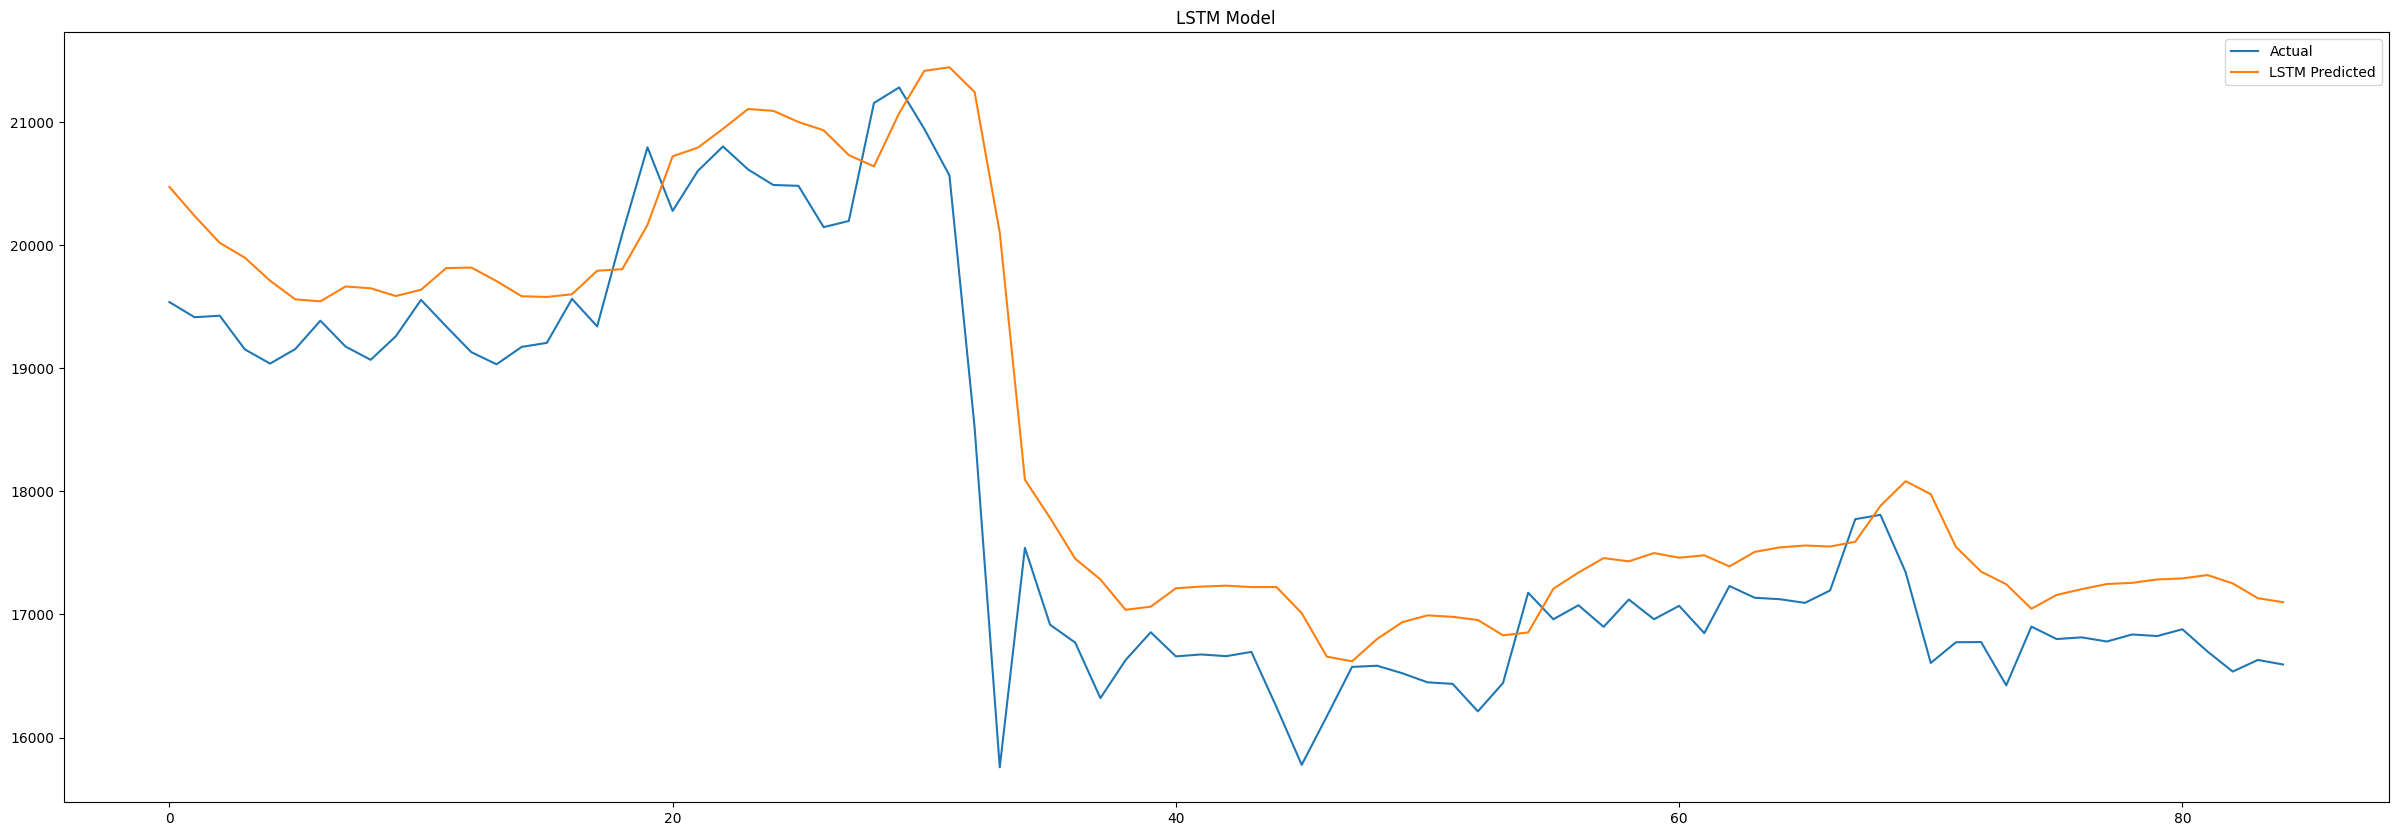

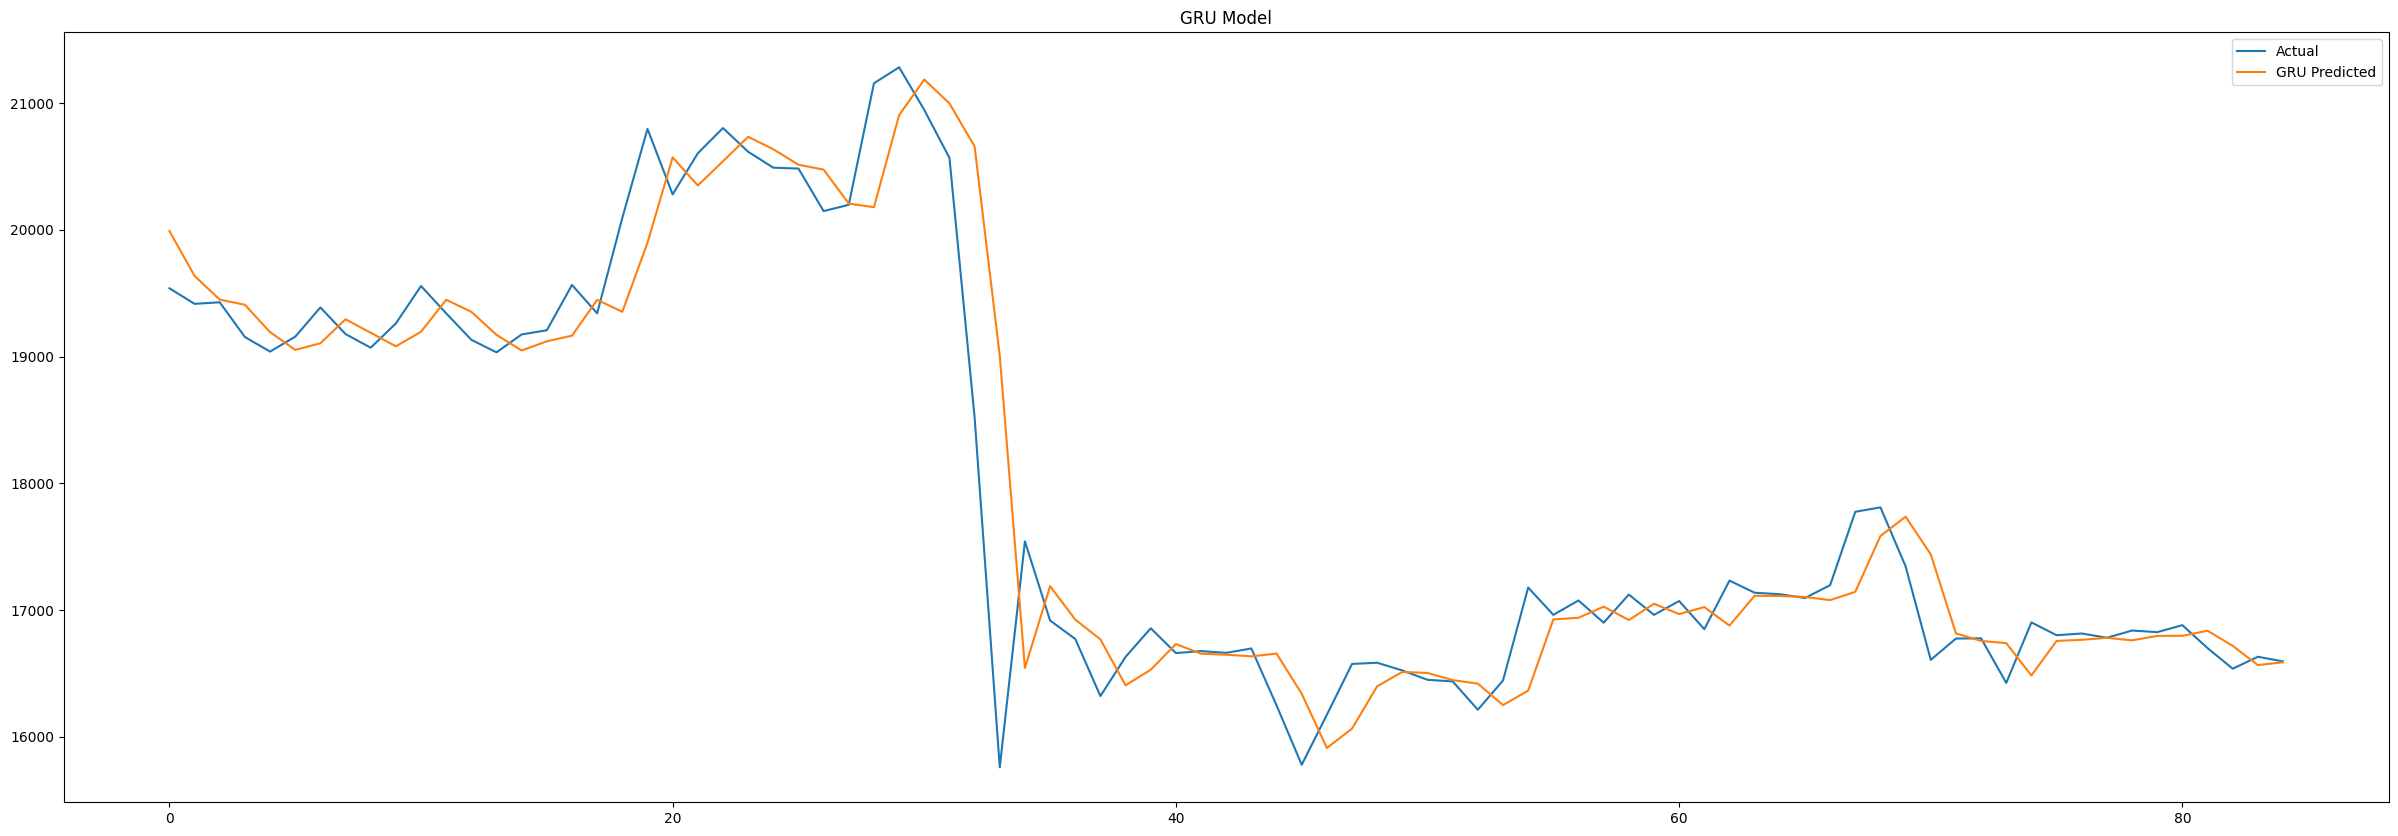

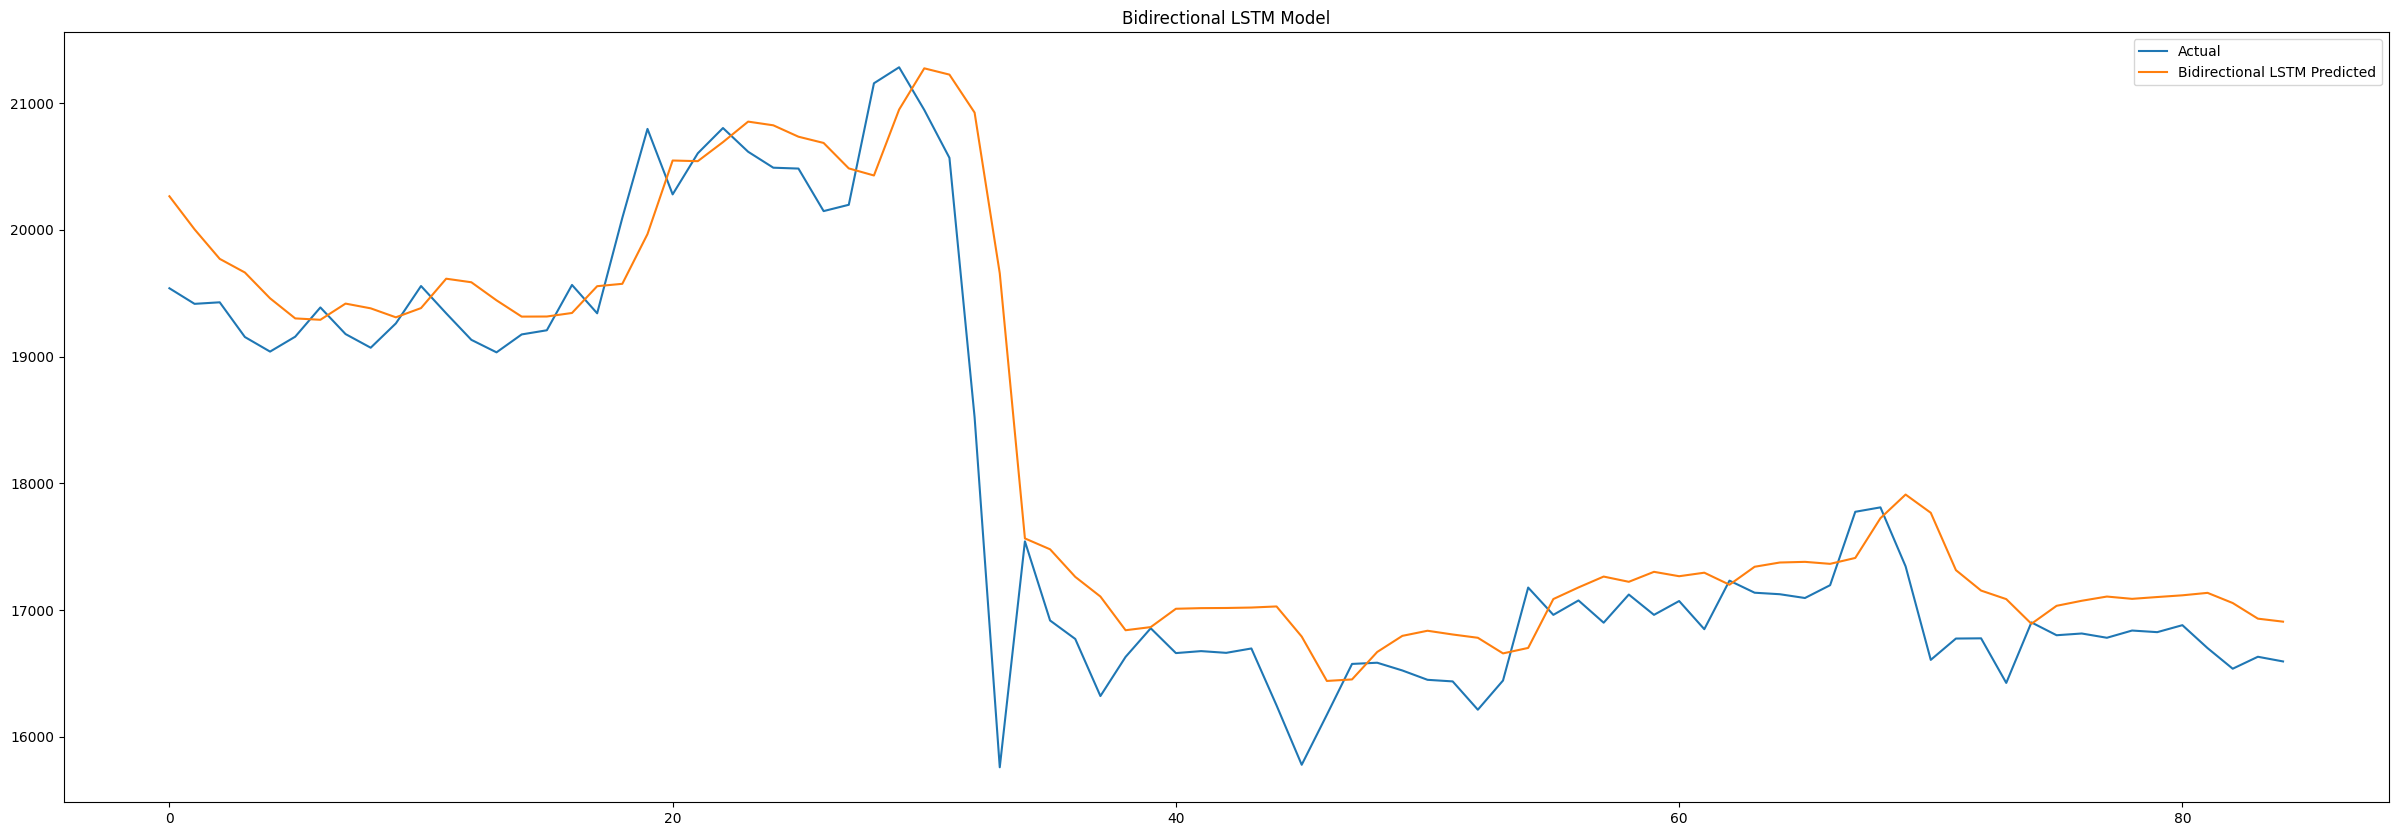

In [57]:
#epochs=100, batch_size=16
# LSTM Train Score: 1704.271629 RMSE
# LSTM Test Score: 785.353986 RMSE
# GRU Train Score: 1591.399579 RMSE
# GRU Test Score: 531.869821 RMSE   -----------Best
# Bidirectional LSTM Train Score: 1618.070336 RMSE
# Bidirectional LSTM Test Score: 640.711977 RMSE

###############################################################################
#epochs=100, batch_size=32 
# LSTM Train Score: 1786.696368 RMSE
# LSTM Test Score: 682.383162 RMSE
# GRU Train Score: 1649.408414 RMSE
# GRU Test Score: 581.439401 RMSE
# Bidirectional LSTM Train Score: 1799.927109 RMSE
# Bidirectional LSTM Test Score: 781.221106 RMSE

###############################################################################
# epochs=200, batch_size=32
# LSTM Train Score: 1602.403235 RMSE
# LSTM Test Score: 584.875865 RMSE 
# GRU Train Score: 1576.879083 RMSE
# GRU Test Score: 557.077331 RMSE
# Bidirectional LSTM Train Score: 1580.433644 RMSE
# Bidirectional LSTM Test Score: 577.693258 RMSE   

###############################################################################
# epochs=50, batch_size=32
# LSTM Train Score: 1948.512604 RMSE
# LSTM Test Score: 746.162367 RMSE
# GRU Train Score: 1849.176432 RMSE
# GRU Test Score: 679.215732 RMSE
# Bidirectional LSTM Train Score: 2018.692727 RMSE
# Bidirectional LSTM Test Score: 991.215224 RMSE

###############################################################################
# epochs=50, batch_size=16
# LSTM Train Score: 1822.681781 RMSE
# LSTM Test Score: 646.263745 RMSE
# GRU Train Score: 1600.468638 RMSE
# GRU Test Score: 592.529445 RMSE
# Bidirectional LSTM Train Score: 1788.867445 RMSE
# Bidirectional LSTM Test Score: 780.440316 RMSE

###############################################################################
# epochs=100, batch_size=16,
# LSTM Train Score: 1625.437964 RMSE
# LSTM Test Score: 596.853581 RMSE
# GRU Train Score: 1593.085841 RMSE
# GRU Test Score: 603.404622 RMSE
# Bidirectional LSTM Train Score: 1578.013525 RMSE
# Bidirectional LSTM Test Score: 626.474452 RMSE

###############################################################################
# epochs=200, batch_size=16
# LSTM Train Score: 1589.770749 RMSE
# LSTM Test Score: 549.044880 RMSE    
# GRU Train Score: 1651.355672 RMSE
# GRU Test Score: 543.305754 RMSE
# Bidirectional LSTM Train Score: 1612.087111 RMSE
# Bidirectional LSTM Test Score: 616.623523 RMSE

###############################################################################
# epochs=300, batch_size=16
# LSTM Train Score: 1609.345855 RMSE
# LSTM Test Score: 711.171870 RMSE
# GRU Train Score: 1596.935683 RMSE
# GRU Test Score: 695.383226 RMSE
# Bidirectional LSTM Train Score: 1552.445041 RMSE
# Bidirectional LSTM Test Score: 561.258694 RMSE  ----------Best

###############################################################################
# epochs=300, batch_size=32
# LSTM Train Score: 1596.584966 RMSE
# LSTM Test Score: 535.667065 RMSE  ----------Best
# GRU Train Score: 1812.308887 RMSE
# GRU Test Score: 792.481052 RMSE
# Bidirectional LSTM Train Score: 1566.928065 RMSE
# Bidirectional LSTM Test Score: 590.680610 RMSE



# Plot the actual prices and predicted prices
plt.figure(figsize=(30,10))
plt.plot(test_y_lstm[0])
plt.plot(test_predict_lstm[:,0])
plt.legend(['Actual', 'LSTM Predicted'])
plt.title('LSTM Model')
plt.show()

plt.figure(figsize=(30,10))
plt.plot(test_y_gru[0])
plt.plot(test_predict_gru[:,0])
plt.legend(['Actual', 'GRU Predicted'])
plt.title('GRU Model')
plt.show()

plt.figure(figsize=(30,10))
plt.plot(test_y_bilstm[0])
plt.plot(test_predict_bilstm[:,0])
plt.legend(['Actual', 'Bidirectional LSTM Predicted'])
plt.title('Bidirectional LSTM Model')
plt.show()
